# Math 466 Spring 2025: Homework 1

###  Due Th Feb 6th, 10pm EST


Please give your NAME in the handin file.



---

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


random_state = 2025
rng = np.random.RandomState(random_state)


----

**Problem 2 (a)** Linearly separable dataset.

In [21]:
# create linearly separable dataset
X, y = make_classification(n_features=2, 
                           n_redundant=0, 
                           n_informative=2,
                           n_samples= 1700,
                           random_state=random_state, 
                           n_clusters_per_class=1)

X = X + .1*rng.uniform(size=X.shape)

#split training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=100,
    random_state=random_state)
X_train1, y_train1 = X_train[:100,:], y_train[:100]
X_train5, y_train5 = X_train[100:600,:], y_train[100:600]
X_train10, y_train10 = X_train[600:,:], y_train[600:]



Text(0.5, 1.0, 'testing')

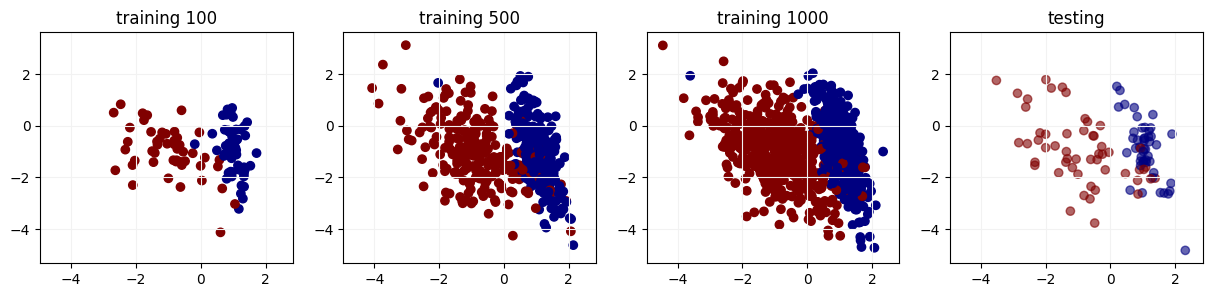

In [22]:
# obtain a mesh in the 2D plane
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

fig = plt.figure(figsize=(15, 3))
# Plot the training points
ax = fig.add_subplot(1,4,1)
ax.scatter(X_train1[:, 0], X_train1[:, 1], 
           c=y_train1, cmap= 'jet')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('training 100')

ax = fig.add_subplot(1,4,2)
ax.scatter(X_train5[:, 0], X_train5[:, 1], 
           c=y_train5, cmap= 'jet')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('training 500')

ax = fig.add_subplot(1,4,3)
ax.scatter(X_train10[:, 0], X_train10[:, 1], 
           c=y_train10, cmap= 'jet')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('training 1000')


# Plot the testing points
ax = fig.add_subplot(1,4,4)
ax.scatter(X_test[:, 0], X_test[:, 1], 
           c=y_test, cmap= 'jet', alpha=0.6)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('testing')

In [40]:
def train_and_evaluate(X_train, y_train, X_test, y_test):
    models = {
        "Logistic Regression": LogisticRegression(),
        "kNN (k=5)": KNeighborsClassifier(n_neighbors=5),
        "MLP": MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)
    }

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)  # Train the model
        train_acc = accuracy_score(y_train, model.predict(X_train))
        test_acc = accuracy_score(y_test, model.predict(X_test))
        results[name] = (train_acc, test_acc)
    
    return results


print("\nResults for Linearly Separable Dataset:")
for size, (X_train, y_train) in zip(["100", "500", "1000"], [(X_train1, y_train1), (X_train5, y_train5), (X_train10, y_train10)]):
    print(f"\nTraining with {size} samples:")
    results = train_and_evaluate(X_train, y_train, X_test, y_test)
    for model, (train_acc, test_acc) in results.items():
        print(f"{model}: Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}")


Results for Linearly Separable Dataset:

Training with 100 samples:
Logistic Regression: Train Acc = 0.520, Test Acc = 0.430
kNN (k=5): Train Acc = 0.980, Test Acc = 0.960
MLP: Train Acc = 1.000, Test Acc = 0.970

Training with 500 samples:
Logistic Regression: Train Acc = 0.508, Test Acc = 0.610
kNN (k=5): Train Acc = 0.998, Test Acc = 1.000
MLP: Train Acc = 1.000, Test Acc = 0.990

Training with 1000 samples:
Logistic Regression: Train Acc = 0.519, Test Acc = 0.390
kNN (k=5): Train Acc = 0.997, Test Acc = 0.990
MLP: Train Acc = 0.996, Test Acc = 0.980


----

**Problem 2 (b)** Two-ring dataset.

In [42]:
# create linearly separable dataset
X, y = make_circles(noise=0.1,
                  n_samples= 1700, factor = 0.5,
                  random_state=random_state)

#split training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=100,
    random_state=random_state)
X_train1, y_train1 = X_train[:100,:], y_train[:100]
X_train5, y_train5 = X_train[100:600,:], y_train[100:600]
X_train10, y_train10 = X_train[600:,:], y_train[600:]


Text(0.5, 1.0, 'testing')

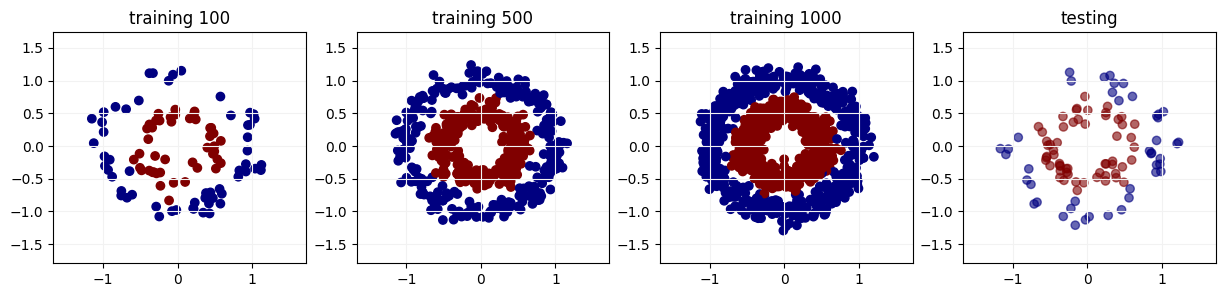

In [44]:
# obtain a mesh in the 2D plane
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

fig = plt.figure(figsize=(15, 3))
# Plot the training points
ax = fig.add_subplot(1,4,1)
ax.scatter(X_train1[:, 0], X_train1[:, 1], 
           c=y_train1, cmap= 'jet')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('training 100')

ax = fig.add_subplot(1,4,2)
ax.scatter(X_train5[:, 0], X_train5[:, 1], 
           c=y_train5, cmap= 'jet')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('training 500')

ax = fig.add_subplot(1,4,3)
ax.scatter(X_train10[:, 0], X_train10[:, 1], 
           c=y_train10, cmap= 'jet')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('training 1000')


# Plot the testing points
ax = fig.add_subplot(1,4,4)
ax.scatter(X_test[:, 0], X_test[:, 1], 
           c=y_test, cmap= 'jet', alpha=0.6)
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
plt.grid(color='0.95')
plt.title('testing')

---

In [45]:
print("\nResults for Two-Ring Dataset:")
for size, (X_train, y_train) in zip(["100", "500", "1000"], [(X_train1, y_train1), (X_train5, y_train5), (X_train10, y_train10)]):
    print(f"\nTraining with {size} samples:")
    results = train_and_evaluate(X_train, y_train, X_test, y_test)
    for model, (train_acc, test_acc) in results.items():
        print(f"{model}: Train Acc = {train_acc:.3f}, Test Acc = {test_acc:.3f}")


Results for Two-Ring Dataset:

Training with 100 samples:
Logistic Regression: Train Acc = 0.520, Test Acc = 0.430
kNN (k=5): Train Acc = 0.980, Test Acc = 0.960
MLP: Train Acc = 1.000, Test Acc = 0.970

Training with 500 samples:


/Users/edwinmaore/miniconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Logistic Regression: Train Acc = 0.508, Test Acc = 0.610
kNN (k=5): Train Acc = 0.998, Test Acc = 1.000
MLP: Train Acc = 1.000, Test Acc = 1.000

Training with 1000 samples:
Logistic Regression: Train Acc = 0.519, Test Acc = 0.390
kNN (k=5): Train Acc = 0.997, Test Acc = 0.990
MLP: Train Acc = 0.995, Test Acc = 0.990


In [27]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(["#FFAAAA", "#AAAAFF"]))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(["#FF0000", "#0000FF"]))
    plt.title(title)
    plt.show()

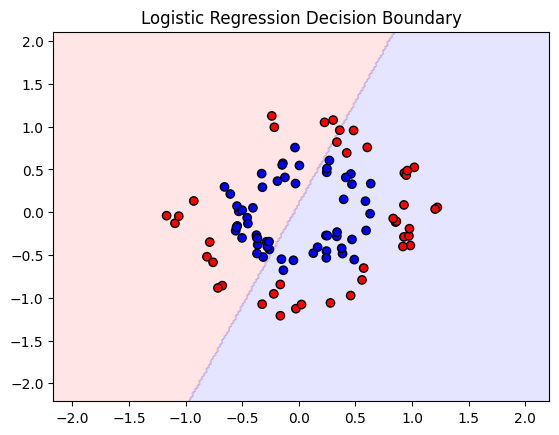

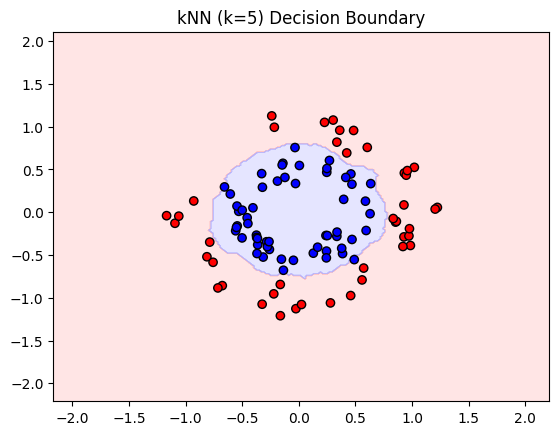

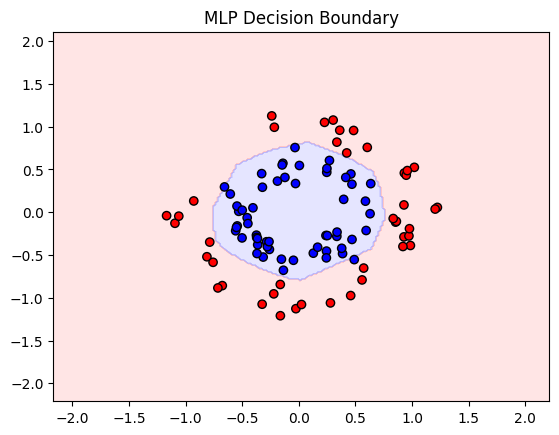

In [38]:
# Define the models dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "kNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "MLP": MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=500)
}


for name, model in models.items():
    model.fit(X_train10, y_train10)  # Train on largest dataset (1000 samples)
    plot_decision_boundary(model, X_test, y_test, f"{name} Decision Boundary")
